In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import ast

In [5]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Jobstreet/Jobstreet-artist.csv",
   "../../Raw_CSV/April 27 - 2022/Jobstreet/Jobstreet-artist.csv",
    "../../Raw_CSV/April 28 - 2022/Jobstreet/Jobstreet-artist.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)

In [6]:
merge

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
0,Graphic Artist,ARUZE PHILIPPINES MANUFACTURING INC,Batangas,None,"PHP 11,500 - PHP 13,000",[],['· Mainly responsible for creating character ...,"['Full-Time', 'Average Processing Time']",['· Mainly responsible for creating character ...,Less than 1 Year Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Lo...",201 - 500 Employees
1,Multimedia Artist (WFH),"Property Company of Friends, Inc.",National Capital Reg,Understand creative material requirements of t...,None,['Understand creative material requirements of...,[],"['Full-Time', 'Average Processing Time']",['Job Summary:Mainly responsible for designing...,1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Lo...",1001 - 2000 Employees
2,Graphic Artist,TOPBOND PHILIPPINES INC.,Quezon City,None,None,[],"['Job Description', ""1. Graduate of Bachelor's...","['Full-Time', 'Average Processing Time']","[""Job Description1. Graduate of Bachelor's/Col...",1-4 Years Experienced Employee,[],51 - 200 Employees
3,SR. Graphic Artist,ARUZE PHILIPPINES MANUFACTURING INC,Makati City,None,"PHP 30,000 - PHP 40,000",[],"['· Manage schedule of projects in your team',...","['Full-Time', 'Average Processing Time']",['· Manage schedule of projects in your team· ...,1-4 Years Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Lo...",201 - 500 Employees
4,Multimedia Artist,SilverLush Food Corp,National Capital Reg,None,"PHP 25,000 - PHP 30,000",[],"['Silverlush is looking for Mulimedia Artist',...",['Full-Time'],['Silverlush is looking for Mulimedia ArtistJo...,1-4 Years Experienced Employee,"['Miscellaneous allowance, Medical, Regular ho...",1 - 50 Employees
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Creative Lead,Ohmyhome Property Inc.,National Capital Reg,Work directly with the CPO on creative and mar...,"PHP 60,000 - PHP 80,000",['Work directly with the CPO on creative and m...,"['Requirements:', 'What we can offer?']",['Full-Time'],"[""Work directly with the CPO on creative and m...",NaN,"['Dental, Medical, Parking, Regular hours, Mon...",1 - 50 Employees
1046,Digital Marketing Designer,"RipeConcepts, Inc.",Central Visayas,Produce attention-grabbing creative assets (st...,None,['Produce attention-grabbing creative assets (...,"['Digital Marketing Designer', 'As a Digital M...","['Full-Time', 'Average Processing Time']",['Digital Marketing DesignerAs a Digital Marke...,Supervisor/5 Years & Up Experienced Employee,"['Dental, Medical, Regular hours, Mondays - Fr...",201 - 500 Employees
1047,Senior Graphics Designer - Print and Digital,Cloudstaff Philippines Inc.,Central Luzon,Design new product packaging and update curren...,None,['Design new product packaging and update curr...,[],"['Full-Time', 'Average Processing Time']","[""JR-5681 -\xa0 Senior Graphics Designer - Pri...",Supervisor/5 Years & Up Experienced Employee,"['Dental, Education support, Medical, Company ...",2001 - 5000 Employees
1048,Motion Graphics Designer (Mid- Senior Level) -...,Emapta,National Capital Reg,Turn ideas and concepts into visual.,None,"['Turn ideas and concepts into visual.', 'Prod...",[],"['Full-Time', 'Average Processing Time']",['Position purpose: Owns the conceptualization...,Supervisor/5 Years & Up Experienced Employee,"['Dental, Miscellaneous allowance, Medical, Lo...",2001 - 5000 Employees


In [7]:
merge.describe()

,Title,Company,Location,Summary,Salary,Qualification & Skills,Role and Responsibilities,Job Type,Company Profile&Job Desc,Career Level,Benefits,Company Size
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1024,1050,1008
unique,212,275,37,238,79,258,211,38,355,3,157,8
top,Graphic Artist,United Steel Technology (STEELTECH) Int'l Corp...,National Capital Reg,None,None,[],[],"['Full-Time', 'Average Processing Time']",['Candidate must possess at least College Grad...,1-4 Years Experienced Employee,[],1 - 50 Employees
freq,172,25,430,227,616,227,391,592,24,786,386,260


In [8]:
job_title_lower = merge["Title"].str.lower()

In [9]:
job_title = job_title_lower.value_counts()[0:10]

In [10]:
job_title

graphic artist                                          223
graphic designer                                        117
multimedia artist                                        41
multimedia artist - manila                               25
ar/vr technical artist                                   19
creative specialist (video animator)                     12
web developer / graphic artist / marketing assistant     12
graphic artist - las piñas (fresh graduates)             12
multimedia artist/video animator                         11
web/graphic designer                                     11
Name: Title, dtype: int64

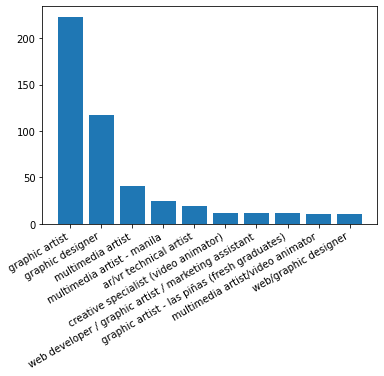

In [11]:
plt.bar(job_title.index, job_title.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [12]:
company_name = merge["Company"].value_counts()[0:10]

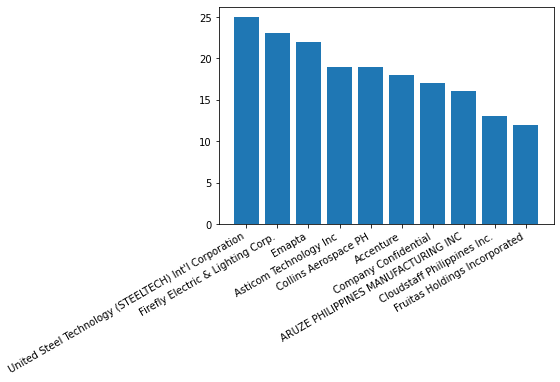

In [13]:
plt.bar(company_name.index, company_name.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [14]:
company_location = merge["Location"].value_counts()[0:10]

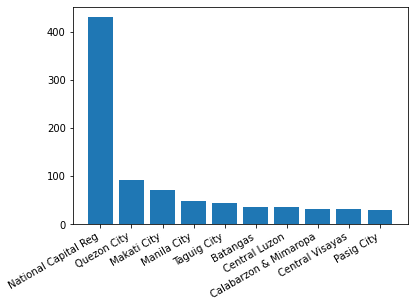

In [15]:
plt.bar(company_location.index, company_location.values)
plt.xticks(rotation="30", ha="right")
plt.show()


In [16]:
filt = (merge["Salary"] != "None")
results = merge.loc[filt]

In [157]:
salary = results["Salary"].value_counts()[0:10]

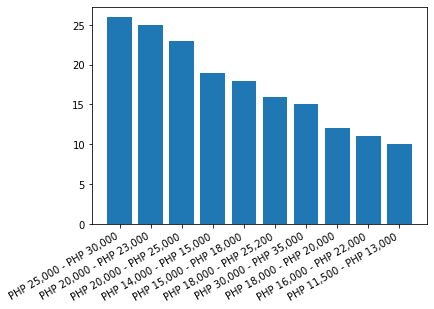

In [18]:
plt.bar(salary.index, salary.values)
plt.xticks(rotation="30", ha="right")
plt.show()

In [115]:
job_type = merge["Job Type"].apply(ast.literal_eval)
job_type_append = []
for i in job_type:
    job_type_append.append(job_type[0][0])

In [50]:
# List to Dataframe ( Count Job Type )
job_type_df = pd.DataFrame(job_type_append,columns=["Job Type"])
job_type_df.value_counts()


Job Type 
Full-Time    1050
dtype: int64

In [153]:
career_level = merge["Career Level"]
count_career_level = career_level.value_counts()
count_career_level

1-4 Years Experienced Employee                  786
Less than 1 Year Experienced Employee           170
Supervisor/5 Years & Up Experienced Employee     68
Name: Career Level, dtype: int64

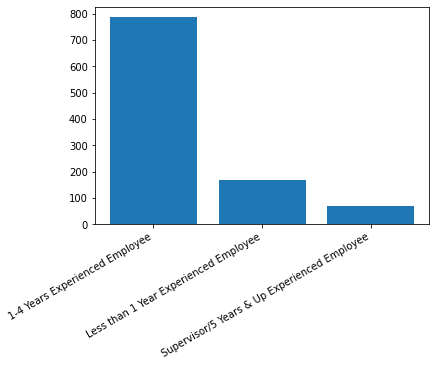

In [57]:
plt.bar(count_career_level.index, count_career_level.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [66]:
company_size = merge["Company Size"]
count_company_size = company_size.value_counts()[0:6]
count_company_size

1 - 50 Employees         260
51 - 200 Employees       203
201 - 500 Employees      188
2001 - 5000 Employees    115
501 - 1000 Employees      96
1001 - 2000 Employees     79
Name: Company Size, dtype: int64

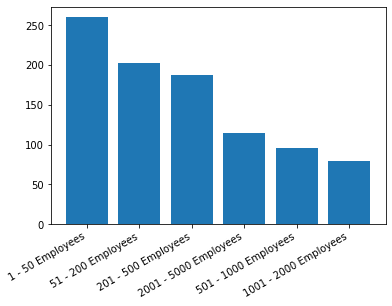

In [67]:
plt.bar(count_company_size.index, count_company_size.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [130]:
benefits = merge["Benefits"].str.replace("^\['|'\]$","")
benefits_append = []
split_benefits = benefits.str.split(",")

for i in range(len(split_benefits)):
    for j in split_benefits[i]:
        benefits_append.append(j)


/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_1523/2971443327.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  benefits = merge["Benefits"].str.replace("^\['|'\]$","")


In [185]:
benefits_df = pd.DataFrame(benefits_append, columns=["Benefits"])
strip = benefits_df["Benefits"].str.strip()
filt = (benefits_df["Benefits"] != "Loans")
benefits_count = strip.loc[filt]


In [187]:
benefits_df["Benefits"]

0                          Dental
1         Miscellaneous allowance
2                         Medical
3                           Loans
4                         Parking
                  ...            
5538                      Medical
5539                        Loans
5540         Group Life Insurance
5541     Group Accident Insurance
5542                 smart casual
Name: Benefits, Length: 5543, dtype: object